# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Athallah Anarga Mahardika  
- **Email:** atalamahardika24@gmail.com
- **ID Dicoding:** athallah24  

Dataset bike-sharing ini berisikan data dari 2011 dan 2012. Pada projek ini, kita akan menggunakan data dari `hour.csv` dikarenakan lebih banyak data dan punya 1 feature tambahan yaitu **'hr'**. Kedua data tersebut tidak memiliki hubungan relational sehingga kita menggunakan data yang paling banyak dan lengkap.

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penyewaan sepeda untuk pengguna kasual dan pengguna terdaftar dalam beberapa bulan terakhir?
2. Bulan apa yang paling banyak dan paling sedikit untuk setiap pengguna?
3. Di musim apa yang paling banyak dan paling sedikit untuk setiap pengguna?
4. Bagaimana demografi untuk setiap pengguna?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load tabel hour

In [2]:
# Kode ini digunakan untuk membaca tabel hour dengan format csv
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data Hour

In [3]:
# Kode ini digunakan untuk mengecek tipe data dari setiap kolom/feature dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada tabel hour terdapat beberapa kolom dengan definisi sebagai berikut :  
Kolom | Definisi  
--- | --- 
instant | Indeks rekaman data
dteday | Tanggal
season | Musim (1:springer, 2:summer, 3: fall, 4:winter)
yr | Tahun (0:2011, 1:2012)
mnth | Bulan (1 sampai 12)
hr | Jam (0 sampai 23)
holiday | Apakah hari tersebut libur atau tidak
weekday | Hari dalam seminggu
workingday | Indikator apakah hari tersebut hari kerja (0:holiday, 1:workday)
weathersit | Kondisi cuaca yang dikategorikan menjadi 4 tipe (1:Clear, Few clouds, Partly cloudy, Partly cloudy, 2:Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3:Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4:Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
temp | Suhu dalam Celcius (Nilai dibagi 41)
atemp | Suhu yang dirasakan (Nilai dibagi 50)
hum | Kelembapan (Nilai dibagi 100)
windspeed | Kecepatan angin (Nilai dibagi 67)
casual | Jumlah pengguna kasual
registered | Jumlah pengguna terdaftar
cnt | Jumlah total sepeda yang disewa termasuk kasual dan terdaftar


**Namun** terdapat keanehan pada kolom **`dteday`** bertipe data `object` yang seharusnya bertipe data `datetime`. Selanjutnya kita cek apakah ada missing value dan duplikasi data pada tabel hour.

In [4]:
# Kode ini digunakan untuk mengecek apakah ada missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Setelah diperiksa ternyata tidak ada missing values, selanjutnya akan kita cek apakah ada data duplikasi

In [5]:
# Kode ini digunakan untuk mengecek apakah ada data duplikasi
print("Jumlah duplikasi pada data hour : ", hour_df.duplicated().sum())

Jumlah duplikasi pada data hour :  0


Setelah diperiksa ternyata tidak ada data duplikasi. Langkah selanjutnya, kita periksa parameter statistik dari tabel hour.

In [6]:
#  Kode ini digunakan untuk mengecek parameter statistik dari tabel hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Setelah itu kita cek apakah ada outlier dalam data di tiap kolom menggunakan 2 metode yaitu box plot dan IQR

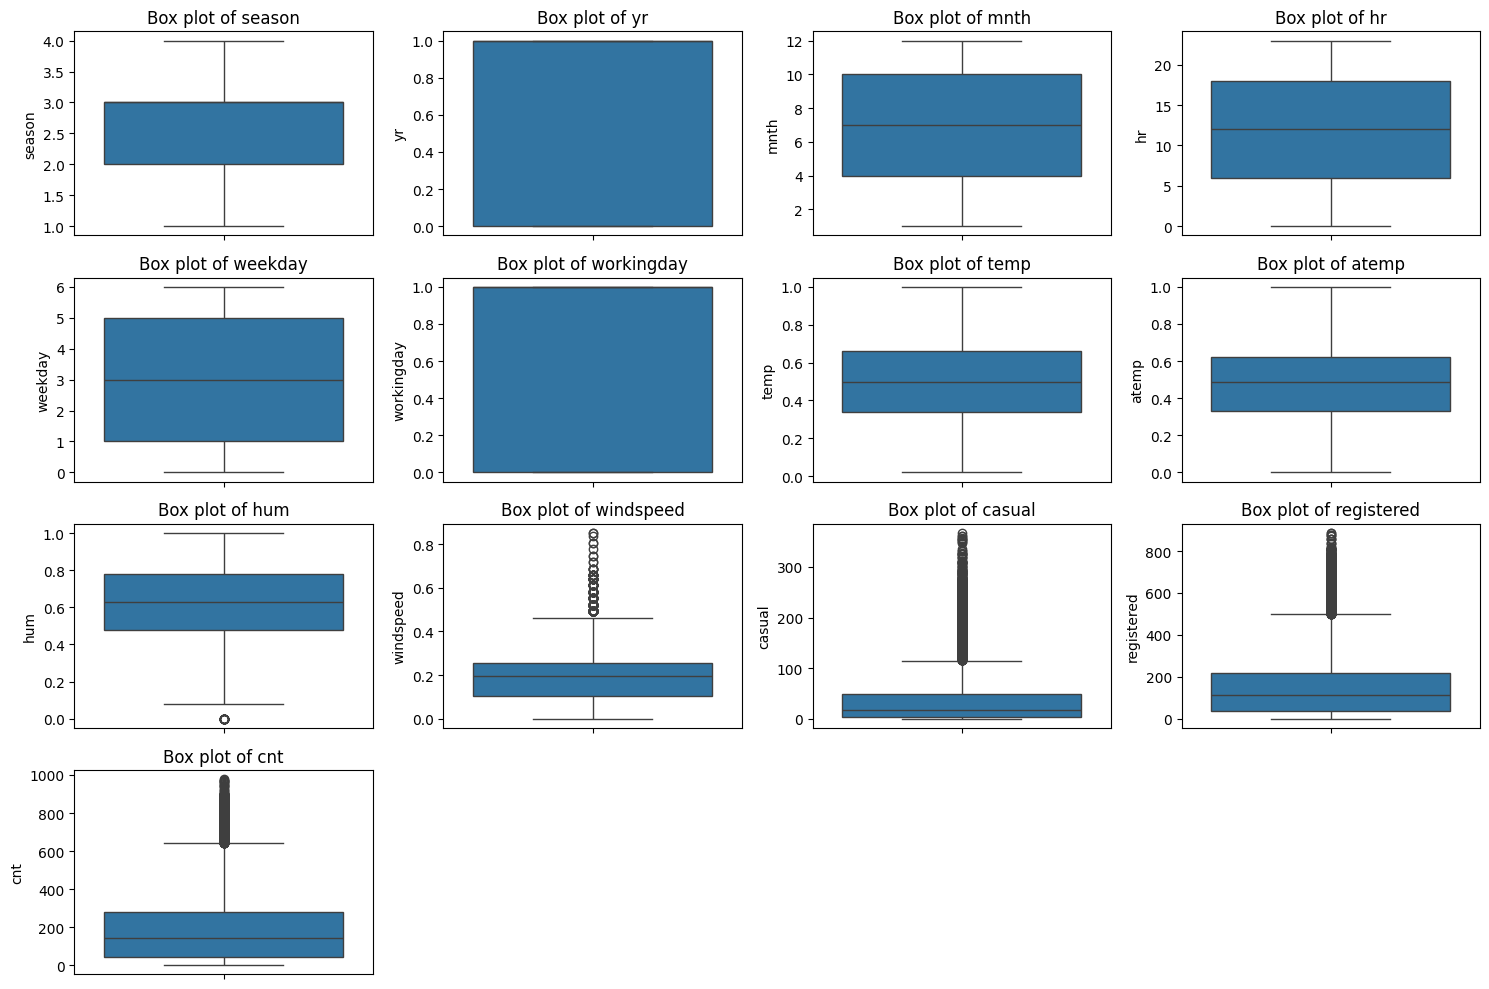

In [7]:
# Membuat box plot untuk setiap kolom kecuali 'instant' dan 'dteday'
columns_to_plot = [col for col in hour_df.columns if col not in ['instant', 'dteday', 'holiday', 'weathersit']]

# Membuat figure dengan ukuran 15x10
plt.figure(figsize=(15, 10))

# Looping untuk membuat subplot box plot untuk setiap kolom
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=hour_df[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

# Menampilkan plot
plt.show()

In [8]:
def count_outliers(column):
    """
    Fungsi ini menghitung jumlah outlier dalam sebuah kolom.
    
    Parameters:
    column (str): Nama kolom yang akan dihitung outliernya.
    
    Returns:
    int: Jumlah outlier dalam kolom.
    """
    Q1 = hour_df[column].quantile(0.25)
    Q3 = hour_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = hour_df[(hour_df[column] < lower_bound) | (hour_df[column] > upper_bound)]
    return len(outliers)

# Memeriksa outlier di setiap kolom kecuali 'instant' dan 'dteday'
for column in columns_to_plot:
    num_outliers = count_outliers(column)
    print(f"Jumlah outlier pada {column} : {num_outliers}")

Jumlah outlier pada season : 0
Jumlah outlier pada yr : 0
Jumlah outlier pada mnth : 0
Jumlah outlier pada hr : 0
Jumlah outlier pada weekday : 0
Jumlah outlier pada workingday : 0
Jumlah outlier pada temp : 0
Jumlah outlier pada atemp : 0
Jumlah outlier pada hum : 22
Jumlah outlier pada windspeed : 342
Jumlah outlier pada casual : 1192
Jumlah outlier pada registered : 680
Jumlah outlier pada cnt : 505


#### **Kesimpulan Assesing Data:**  
Pada tabel hour_df terdapat 17.379 data entri dengan 17 kolom. Data tersebut sudah dilakukan penilaian dengan pengecekan dimulai dari tipe data, missing value, duplicate data, inaccurate value, dan outliers yang dapat mempengaruhi dalam melakukan analisis data. Berikut merupakan hasil penilaian:  
Tabel Data | Tipe Data | Missing Value | Duplicate Data | Inaccurate Value 
  --- | --- | --- | --- | --- 
  hour_df | Terdapat kesalahan tipe data untuk kolom dteday | - | - | -   

Selain itu, terdapat beberapa kolom data yang memiliki outlier seperti:
Kolom | Jumlah outlier  
  --- | ---
  hum | 22
  windspeed | 342
  casual | 1192
  registered | 680
  cnt | 505

### Cleaning Data

#### Membersihkan Data Hour

Berdasarkan assesing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday. Untuk mengatasi masalah ini, kita akan mengganti tipe data menggunakan fungsi to_datetime().

In [9]:
# Kode di bawah ini membuat list dengan nama variabel datetime_columns yang menyimpan nama kolom yang akan diproses sebagai date time
datetime_columns = ["dteday"]

# Kode di bawah ini digunakan untuk mengubah kolom yang ingin diubah pada tabel hour
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

Setelah kita menjalankan kode diatas, kita akan mengecek kembali tipe data untuk kolom dteday

In [10]:
# Kode ini digunakan untuk mengecek tipe data dari setiap kolom/feature dalam day_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data untuk kolom dteday sudah berhasil diubah menjadi datetime. Untuk outlier kita akan menanganinya dengan mengubah nilai outlier menggunakan nilai ambang batas (boundary value)

In [11]:
def replace_outliers_with_boundary(column):
    """
    Fungsi ini menggantikan nilai outlier dalam sebuah kolom dengan nilai batas bawah atau batas atas dari IQR.
    
    Parameters:
    column (str): Nama kolom yang akan diimputasi outliernya.
    """
    Q1 = hour_df[column].quantile(0.25)
    Q3 = hour_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mengubah nilai batas bawah dan batas atas ke tipe data yang sama dengan kolom
    lower_bound = lower_bound.astype(hour_df[column].dtype)
    upper_bound = upper_bound.astype(hour_df[column].dtype)
    
    hour_df.loc[hour_df[column] < lower_bound, column] = lower_bound
    hour_df.loc[hour_df[column] > upper_bound, column] = upper_bound

# Mengganti outlier di setiap kolom kecuali 'instant' dan 'dteday' dengan boundary value
for column in columns_to_plot:
    replace_outliers_with_boundary(column)

# Mengecek kembali apakah ada outlier setelah mengganti dengan boundary value
for column in columns_to_plot:
    num_outliers = count_outliers(column)
    print(f"Jumlah outlier pada {column} setelah mengganti dengan boundary value: {num_outliers}")

Jumlah outlier pada season setelah mengganti dengan boundary value: 0
Jumlah outlier pada yr setelah mengganti dengan boundary value: 0
Jumlah outlier pada mnth setelah mengganti dengan boundary value: 0
Jumlah outlier pada hr setelah mengganti dengan boundary value: 0
Jumlah outlier pada weekday setelah mengganti dengan boundary value: 0
Jumlah outlier pada workingday setelah mengganti dengan boundary value: 0
Jumlah outlier pada temp setelah mengganti dengan boundary value: 0
Jumlah outlier pada atemp setelah mengganti dengan boundary value: 0
Jumlah outlier pada hum setelah mengganti dengan boundary value: 0
Jumlah outlier pada windspeed setelah mengganti dengan boundary value: 0
Jumlah outlier pada casual setelah mengganti dengan boundary value: 0
Jumlah outlier pada registered setelah mengganti dengan boundary value: 0
Jumlah outlier pada cnt setelah mengganti dengan boundary value: 0


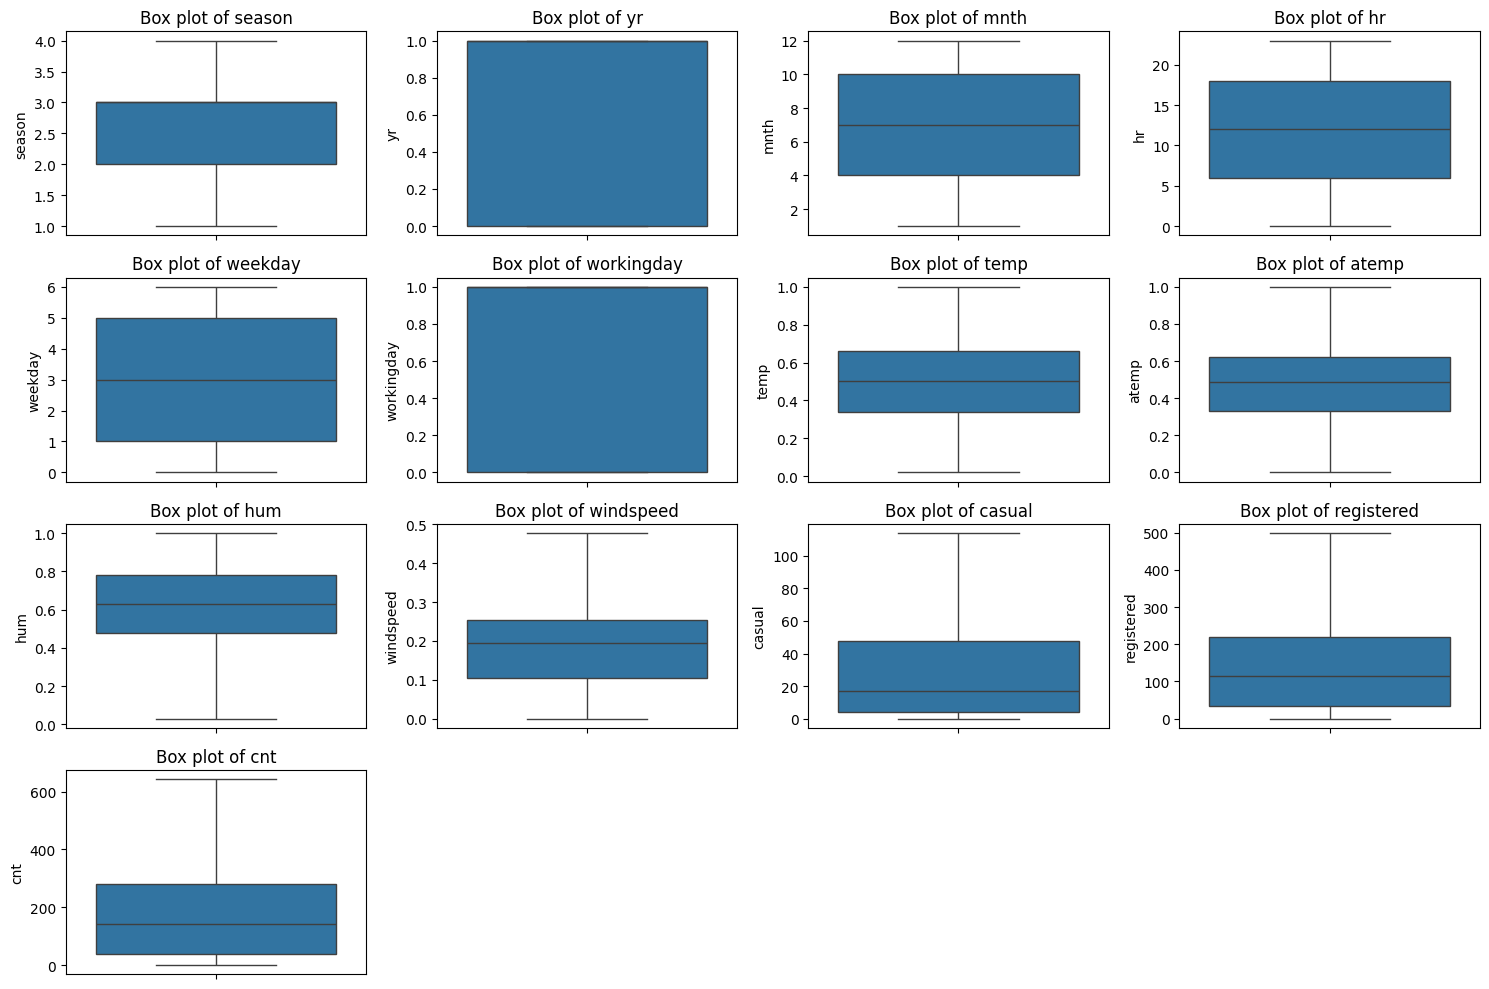

In [12]:
# Membuat figure dengan ukuran 15x10
plt.figure(figsize=(15, 10))

# Looping untuk membuat subplot box plot untuk setiap kolom
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=hour_df[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

# Menampilkan plot
plt.show()

Setelah dilakukan pembersihan terhadap outlier dan di cek kembali menggunakan IQR dan box plot, tidak ada outlier yang muncul lagi

In [13]:
# Menghitung jumlah kolom casual dan registered
hour_df['calculated_cnt'] = hour_df['casual'] + hour_df['registered']

# Memeriksa apakah calculated_cnt sama dengan cnt
hour_df['is_cnt_correct'] = hour_df['cnt'] == hour_df['calculated_cnt']

# Menampilkan baris di mana cnt tidak benar
incorrect_cnt = hour_df[~hour_df['is_cnt_correct']]
print(f"Jumlah nilai cnt yang tidak benar: {len(incorrect_cnt)}")
print(incorrect_cnt)

Jumlah nilai cnt yang tidak benar: 1821
       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
1633      1634 2011-03-13       1   0     3  14        0        0           0   
1634      1635 2011-03-13       1   0     3  15        0        0           0   
1635      1636 2011-03-13       1   0     3  16        0        0           0   
1771      1772 2011-03-19       1   0     3  12        0        6           0   
1772      1773 2011-03-19       1   0     3  13        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17063    17064 2012-12-18       4   1    12  18        0        2           1   
17077    17078 2012-12-19       4   1    12   8        0        3           1   
17086    17087 2012-12-19       4   1    12  17        0        3           1   
17087    17088 2012-12-19       4   1    12  18        0        3           1   
17101    17102 2012-12-20       4   1    12   8        0        4    

In [14]:
# Mengoreksi nilai dalam kolom 'cnt'
hour_df['cnt'] = hour_df['casual'] + hour_df['registered']

# Memverifikasi koreksi
hour_df['is_cnt_correct'] = hour_df['cnt'] == hour_df['calculated_cnt']
incorrect_cnt = hour_df[~hour_df['is_cnt_correct']]
print(f"Jumlah nilai cnt yang tidak benar setelah koreksi: {len(incorrect_cnt)}")
print(incorrect_cnt)

Jumlah nilai cnt yang tidak benar setelah koreksi: 0
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, calculated_cnt, is_cnt_correct]
Index: []


In [15]:
# Mengubah nama kolom sesuai dengan style guide Python
hour_df.rename(columns={
    'instant': 'index',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'holiday',
    'weekday': 'weekday',
    'workingday': 'working_day',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_rentals',
    'calculated_cnt': 'calculated_total_rentals',
    'is_cnt_correct': 'is_total_rentals_correct'
}, inplace=True)

# Menampilkan 5 baris pertama untuk memverifikasi perubahan
hour_df.head()

,index,date,season,year,month,hour,holiday,weekday,working_day,weather_situation,temperature,feels_like_temperature,humidity,wind_speed,casual_users,registered_users,total_rentals,calculated_total_rentals,is_total_rentals_correct
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,16,True
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,40,True
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,32,True
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,13,True
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,True


#### Menyimpan data yang siap pakai

In [16]:
# Kode di bawah ini untuk menyimpan pada direktori dashboard dengan nama main_data.csv
hour_df.to_csv('./dashboard/main_data.csv', index=False)

## Exploratory Data Analysis (EDA)

### Tahap Explorasi
Tahapan ini dilakukan untuk menggali sebuah data untuk mendapatkan insight baru untuk menjawab pertanyaan bisnis

In [17]:
# deskripsi statistik setelah mengganti outlier
hour_df.describe(include='all')

,index,date,season,year,month,hour,holiday,weekday,working_day,weather_situation,temperature,feels_like_temperature,humidity,wind_speed,casual_users,registered_users,total_rentals,calculated_total_rentals,is_total_rentals_correct
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17379
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627267,0.188691,31.158812,148.645204,179.804016,179.804016,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.030000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,279.000000,279.000000,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.477500,114.000000,499.000000,613.000000,613.000000,NaN


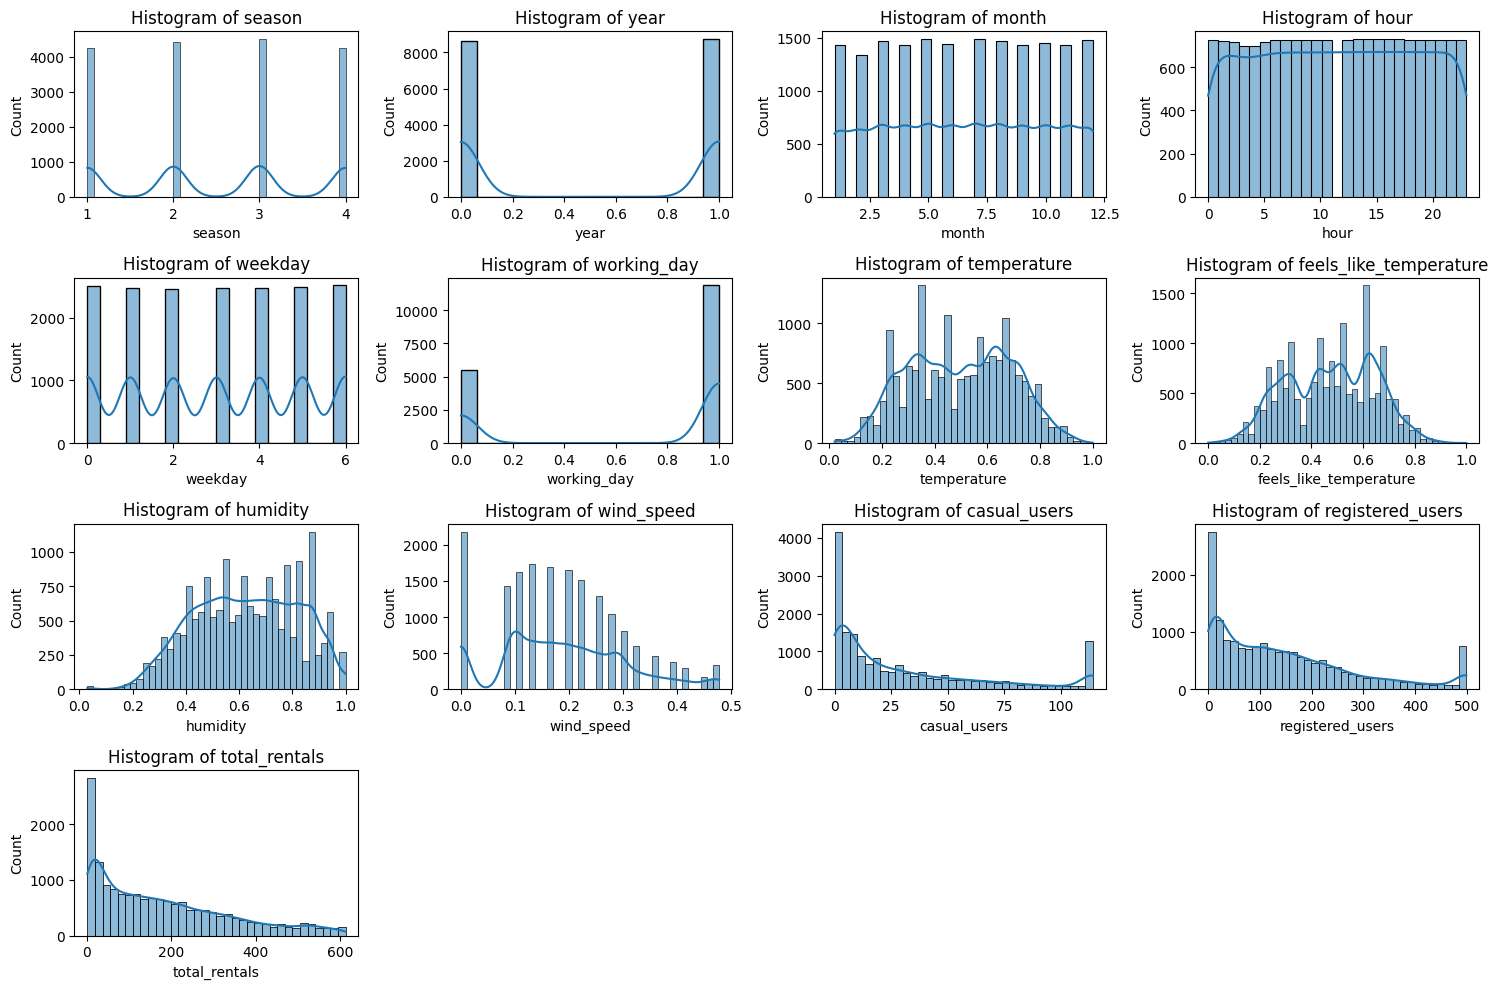

In [18]:
# Update columns_to_plot to reflect the new column names
columns_to_plot = [col for col in hour_df.columns if col not in ['index', 'date', 'holiday', 'weather_situation', 'calculated_total_rentals', 'is_total_rentals_correct']]

# histogram untuk setiap kolom
plt.figure(figsize=(15, 10)) # ukuran figure
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.histplot(hour_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.tight_layout()

Kegunaan dari histogram untuk melihat distribusi data pada setiap kolom/feature secara cepat dan memberikan analisa terkait **Measuring Asymmetric**

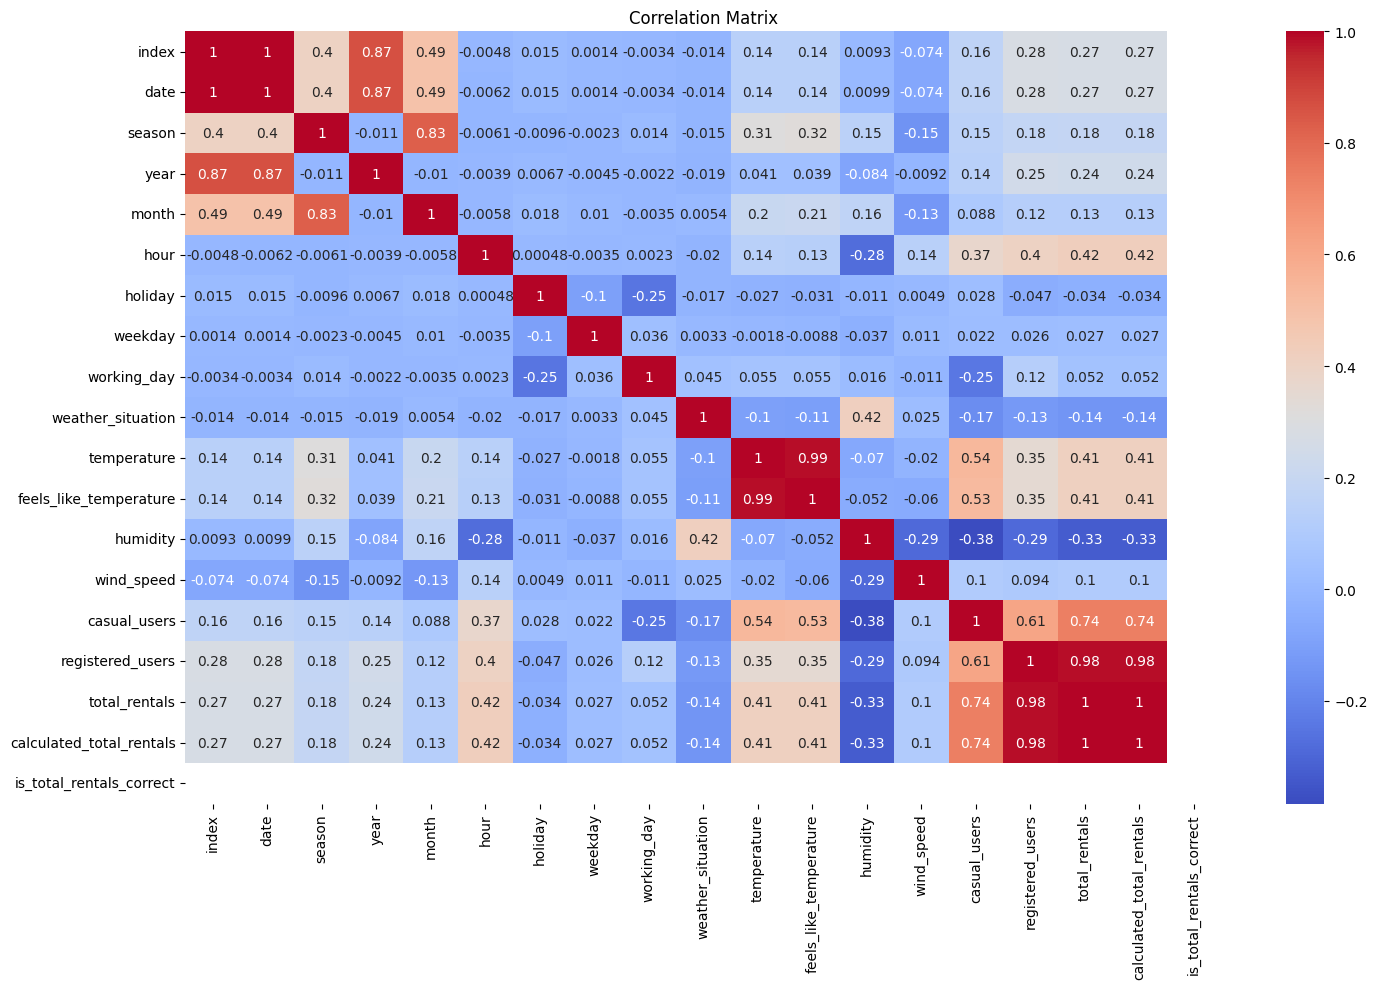

In [19]:
# correlation matrix
plt.figure(figsize=(15, 10)) # ukuran figure
sns.heatmap(hour_df.corr(), annot=True, cmap='coolwarm') # membuat heatmap correlation matrix
plt.title('Correlation Matrix') # judul heatmap correlation matrix
plt.tight_layout()  # layout yang pas
plt.show() # menampilkan plot

Kegunaan correlation matrix ini untuk menilai apakah suatu fitur/kolom memiliki hubungan terhadap fitur yang lain. Pada parameter correlation, nilai negatif menggambarkan korelasi berlawanan (negative correlation), sedangkan nilai positif merepresentasikan korelasi bersesuaian (positive correlation). Jika correlation dari dua feature bernilai nol, keduanya dinyatakan tidak memiliki korelasi (no correlation).

In [20]:
# Definisi month_mapping
month_mapping = {
	1: 'January',
	2: 'February',
	3: 'March',
	4: 'April',
	5: 'May',
	6: 'June',
	7: 'July',
	8: 'August',
	9: 'September',
	10: 'October',
	11: 'November',
	12: 'December'
}

# Definisi year_mapping
year_mapping = {
	0: '2011',
	1: '2012'
}

# Definisi weather_mapping
weather_mapping = {
	1: 'Clear',
	2: 'Mist',
	3: 'Light Rain',
	4: 'Heavy Rain'
}

# Definisi workingday_mapping
workingday_mapping = {
	0: 'Holiday',
	1: 'Working Day'
}

# Definisi weekday_mapping
weekday_mapping = {
	0: 'Sunday',
	1: 'Monday',
	2: 'Tuesday',
	3: 'Wednesday',
	4: 'Thursday',
	5: 'Friday',
	6: 'Saturday'
}

# Mengubah nilai numerik musim menjadi deskripsi
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

Kode diatas untuk digunakan mapping atau mengubah label numerik ke string

### Eksplorasi Pengguna Kasual dan Pengguna Terdaftar berdasarkan Harian

In [21]:
# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah penyewaan untuk pengguna kasual dan terdaftar
daily_user_rentals = hour_df.groupby('date')[['casual_users', 'registered_users']].sum().reset_index()
print(daily_user_rentals)

          date  casual_users  registered_users
0   2011-01-01           331               654
1   2011-01-02           131               670
2   2011-01-03           120              1229
3   2011-01-04           108              1454
4   2011-01-05            82              1518
..         ...           ...               ...
726 2012-12-27           247              1867
727 2012-12-28           644              2451
728 2012-12-29           159              1182
729 2012-12-30           364              1432
730 2012-12-31           439              2290

[731 rows x 3 columns]


Hasil diatas merupakan data jumlah total penyewaan sepeda untuk pengguna kasual dan pengguna terdaftar berdasarkan laporan harian. Disini kita akan mencoba mencari laporan harian dengan jumlah tertinggi dan terendah di setiap pengguna pada tanggal berapa saja.

In [22]:
# Membuat fungsi untuk memformat dan mencetak tanggal dengan jumlah penyewaan tertinggi atau terendah untuk pengguna tertentu di tahun tertentu
def format_and_print_rental_date(df, user_type, year, max_or_min):
    """
    Fungsi ini digunakan untuk memformat dan mencetak tanggal dengan jumlah penyewaan tertinggi atau terendah untuk pengguna tertentu di tahun tertentu.
    
    Parameters:
    df (DataFrame): DataFrame yang berisi data penyewaan harian.
    user_type (str): Jenis pengguna ('casual_users' atau 'registered_users').
    year (int): Tahun yang akan dicari.
    max_or_min (str): Menentukan apakah mencari nilai maksimum atau minimum ('max' atau 'min').
    
    Returns:
    None
    """
    if max_or_min == 'max':
        rental_date = df[(df[user_type] == df[df['date'].dt.year == year][user_type].max()) & (df['date'].dt.year == year)].copy()
        rental_date['date'] = rental_date['date'].dt.strftime('%d-%m-%Y')
        print(f'Jumlah penyewaan tertinggi harian {user_type} di tahun {year} ada di tanggal {rental_date["date"].values}\n')
    elif max_or_min == 'min':
        rental_date = df[(df[user_type] == df[df['date'].dt.year == year][user_type].min()) & (df['date'].dt.year == year)].copy()
        rental_date['date'] = rental_date['date'].dt.strftime('%d-%m-%Y')
        print(f'Jumlah penyewaan terendah harian {user_type} di tahun {year} ada di tanggal {rental_date["date"].values}\n')
    else:
        raise ValueError("Parameter max_or_min harus 'max' atau 'min'")

# Menggunakan fungsi untuk pengguna kasual dan pengguna terdaftar di tahun 2011
format_and_print_rental_date(daily_user_rentals, 'casual_users', 2011, 'max')
format_and_print_rental_date(daily_user_rentals, 'registered_users', 2011, 'max')
format_and_print_rental_date(daily_user_rentals, 'casual_users', 2011, 'min')
format_and_print_rental_date(daily_user_rentals, 'registered_users', 2011, 'min')

# Menggunakan fungsi untuk pengguna kasual dan pengguna terdaftar di tahun 2012
format_and_print_rental_date(daily_user_rentals, 'casual_users', 2012, 'max')
format_and_print_rental_date(daily_user_rentals, 'registered_users', 2012, 'max')
format_and_print_rental_date(daily_user_rentals, 'casual_users', 2012, 'min')
format_and_print_rental_date(daily_user_rentals, 'registered_users', 2012, 'min')


Jumlah penyewaan tertinggi harian casual_users di tahun 2011 ada di tanggal ['04-07-2011']

Jumlah penyewaan tertinggi harian registered_users di tahun 2011 ada di tanggal ['23-08-2011']

Jumlah penyewaan terendah harian casual_users di tahun 2011 ada di tanggal ['18-01-2011']

Jumlah penyewaan terendah harian registered_users di tahun 2011 ada di tanggal ['27-01-2011']

Jumlah penyewaan tertinggi harian casual_users di tahun 2012 ada di tanggal ['09-06-2012']

Jumlah penyewaan tertinggi harian registered_users di tahun 2012 ada di tanggal ['21-09-2012']

Jumlah penyewaan terendah harian casual_users di tahun 2012 ada di tanggal ['29-10-2012']

Jumlah penyewaan terendah harian registered_users di tahun 2012 ada di tanggal ['29-10-2012']



Dari hasil tersebut, bisa kita lihat laporan harian di tahun 2011 dengan penyewaan tertinggi pada pengguna kasual dan pengguna terdaftar di tanggal 04-07-2011 dan 23-08-2011 dan penyewaan terendah di tanggal 18-01-2011 dan 27-01-2011. Sedangkan di tahun 2012 dengan penyewaan tertinggi pada pengguna kasual dan pengguna terdaftar di tanggal 09-06-2012 dan 21-09-2012 dan penyewaan terendah di tanggal 29-10-2012 dan 29-10-2012.

<table>
  <tr>
    <th rowspan="2">Tahun</th>
    <th colspan="2">Pengguna Kasual</th>
    <th colspan="2">Pengguna Terdaftar</th>
  </tr>
  <tr>
    <th>Tertinggi</th>
    <th>Terendah</th>
    <th>Tertinggi</th>
    <th>Terendah</th>
  </tr>
  <tr>
    <td>2011</td>
    <td>04-07-2011</td>
    <td>18-01-2011</td>
    <td>23-08-2011</td>
    <td>27-01-2011</td>
  </tr>
  <tr>
    <td>2012</td>
    <td>09-06-2012</td>
    <td>29-10-2012</td>
    <td>21-09-2012</td>
    <td>29-10-2012</td>
  </tr>
</table>

### Eksplorasi Pengguna Kasual dan Pengguna Terdaftar berdasarkan Bulanan

In [23]:
# Mengelompokkan data berdasarkan tahun dan bulan, lalu menghitung jumlah penyewaan untuk pengguna kasual dan terdaftar
monthly_user_rentals_sum = hour_df.groupby(['year', 'month'])[['casual_users', 'registered_users']].sum().reset_index()

# Mengubah nilai numerik bulan menjadi nama bulan
monthly_user_rentals_sum['month'] = monthly_user_rentals_sum['month'].map(month_mapping)

# Mengubah nilai numerik tahun menjadi deskripsi
monthly_user_rentals_sum['year'] = monthly_user_rentals_sum['year'].map(year_mapping)

# Menampilkan hasil
print(monthly_user_rentals_sum)

    year      month  casual_users  registered_users
0   2011    January          3073             35116
1   2011   February          6242             41973
2   2011      March         12385             51219
3   2011      April         20313             72524
4   2011        May         28156            104610
5   2011       June         28530            112688
6   2011       July         32347            104838
7   2011     August         27530            107596
8   2011  September         24043            100665
9   2011    October         21983             98000
10  2011   November         14951             86549
11  2011   December          8447             78875
12  2012    January          8823             87741
13  2012   February          8372             94051
14  2012      March         26556            128490
15  2012      April         29797            129822
16  2012        May         34567            143652
17  2012       June         35476            150192
18  2012    

Hasil diatas merupakan data jumlah total penyewaan sepeda untuk pengguna kasual dan pengguna terdaftar berdasarkan laporan bulan dan tahun. Disini kita akan mencoba mencari laporan harian dengan jumlah tertinggi dan terendah di setiap pengguna pada bulan dan tahun.

In [24]:
# Mencari bulan dengan jumlah penyewaan tertinggi untuk pengguna kasual tahun 2011
def find_max_min_rentals(monthly_user_rentals_sum, year, user_type, max_or_min):
    """
    Fungsi ini digunakan untuk mencari bulan dengan jumlah penyewaan tertinggi atau terendah untuk pengguna tertentu di tahun tertentu.
    
    Parameters:
    monthly_user_rentals_sum (DataFrame): DataFrame yang berisi data penyewaan bulanan.
    year (str): Tahun yang akan dicari.
    user_type (str): Jenis pengguna ('casual_users' atau 'registered_users').
    max_or_min (str): Menentukan apakah mencari nilai maksimum atau minimum ('max' atau 'min').
    
    Returns:
    DataFrame: DataFrame yang berisi bulan dengan jumlah penyewaan tertinggi atau terendah.
    """
    if max_or_min == 'max':
        result = monthly_user_rentals_sum.loc[(monthly_user_rentals_sum['year'] == year) & 
                                              (monthly_user_rentals_sum[user_type] == monthly_user_rentals_sum[monthly_user_rentals_sum['year'] == year][user_type].max())]
        print(f"Jumlah penyewaan tertinggi untuk pengguna {user_type} di tahun {year} adalah {result[user_type].values[0]}\n")
    elif max_or_min == 'min':
        result = monthly_user_rentals_sum.loc[(monthly_user_rentals_sum['year'] == year) & 
                                              (monthly_user_rentals_sum[user_type] == monthly_user_rentals_sum[monthly_user_rentals_sum['year'] == year][user_type].min())]
        print(f"Jumlah penyewaan terendah untuk pengguna {user_type} di tahun {year} adalah {result[user_type].values[0]}\n")
    else:
        raise ValueError("Parameter max_or_min harus 'max' atau 'min'")
    

# Menggunakan fungsi untuk pengguna kasual dan pengguna terdaftar di tahun 2011
find_max_min_rentals(monthly_user_rentals_sum, '2011', 'casual_users', 'max')
find_max_min_rentals(monthly_user_rentals_sum, '2011', 'registered_users', 'max')
find_max_min_rentals(monthly_user_rentals_sum, '2011', 'casual_users', 'min')
find_max_min_rentals(monthly_user_rentals_sum, '2011', 'registered_users', 'min')

# Menggunakan fungsi untuk pengguna kasual dan pengguna terdaftar di tahun 2012
find_max_min_rentals(monthly_user_rentals_sum, '2012', 'casual_users', 'max')
find_max_min_rentals(monthly_user_rentals_sum, '2012', 'registered_users', 'max')
find_max_min_rentals(monthly_user_rentals_sum, '2012', 'casual_users', 'min')
find_max_min_rentals(monthly_user_rentals_sum, '2012', 'registered_users', 'min')

Jumlah penyewaan tertinggi untuk pengguna casual_users di tahun 2011 adalah 32347

Jumlah penyewaan tertinggi untuk pengguna registered_users di tahun 2011 adalah 112688

Jumlah penyewaan terendah untuk pengguna casual_users di tahun 2011 adalah 3073

Jumlah penyewaan terendah untuk pengguna registered_users di tahun 2011 adalah 35116

Jumlah penyewaan tertinggi untuk pengguna casual_users di tahun 2012 adalah 38847

Jumlah penyewaan tertinggi untuk pengguna registered_users di tahun 2012 adalah 160095

Jumlah penyewaan terendah untuk pengguna casual_users di tahun 2012 adalah 8372

Jumlah penyewaan terendah untuk pengguna registered_users di tahun 2012 adalah 87741



Dari hasil tersebut kita bisa melihat bahwa performa di tahun 2011 untuk masing - masing pengguna dengan jumlah tertinggi ada di bulan July dan June, dan sebaliknya untuk jumlah terendahnya sama - sama di bulan January. Pada tahun 2012 untuk masing - masing pengguna dengan jumlah tertinggi ada di bulan August dan September, dan sebaliknya untuk jumlah terendahnya ada di bulan February dan January. 

<table>
  <tr>
    <th rowspan="2">Tahun</th>
    <th colspan="2">Pengguna Kasual</th>
    <th colspan="2">Pengguna Terdaftar</th>
  </tr>
  <tr>
    <th>Tertinggi</th>
    <th>Terendah</th>
    <th>Tertinggi</th>
    <th>Terendah</th>
  </tr>
  <tr>
    <td>2011</td>
    <td>July</td>
    <td>January</td>
    <td>June</td>
    <td>January</td>
  </tr>
  <tr>
    <td>2012</td>
    <td>August</td>
    <td>February</td>
    <td>September</td>
    <td>January</td>
  </tr>
</table>

### Eksplorasi Pengguna Kasual dan Pengguna Terdaftar Berdasarkan Musim

In [25]:
# Mengelompokkan data berdasarkan tahun, musim, dan jenis pengguna, lalu menghitung jumlah penyewaan di setiap kelompok
seasonal_user_rentals_sum = hour_df.groupby(['year', 'season'])[['casual_users', 'registered_users']].sum().reset_index()

# Mengubah nilai numerik musim menjadi deskripsi
seasonal_user_rentals_sum['season'] = seasonal_user_rentals_sum['season'].map(season_mapping)

# Mengubah nilai numerik tahun menjadi deskripsi
seasonal_user_rentals_sum['year'] = seasonal_user_rentals_sum['year'].map(year_mapping)

# Menampilkan hasil
print(seasonal_user_rentals_sum)

   year  season  casual_users  registered_users
0  2011  Spring         20987            128575
1  2011  Summer         71249            269448
2  2011    Fall         87319            323686
3  2011  Winter         48445            272944
4  2012  Spring         35736            279231
5  2012  Summer         99603            422319
6  2012    Fall        113224            474136
7  2012  Winter         64946            412966


Dari hasil tersebut kita bisa melihat data untuk tiap musim di per tahunnya. Selanjutnya kita akan mencoba mencari musim dengan penyewaan tertinggi dan terendah di setiap pengguna di tahun tertentu.

In [26]:
def find_max_min_seasonal_rentals(seasonal_user_rentals_sum, year, user_type, max_or_min):
    """
    Fungsi ini digunakan untuk mencari musim dengan jumlah penyewaan tertinggi atau terendah untuk pengguna tertentu di tahun tertentu.
    
    Parameters:
    seasonal_user_rentals_sum (DataFrame): DataFrame yang berisi data penyewaan musiman.
    year (str): Tahun yang akan dicari.
    user_type (str): Jenis pengguna ('casual_users' atau 'registered_users').
    max_or_min (str): Menentukan apakah mencari nilai maksimum atau minimum ('max' atau 'min').
    
    Returns:
    DataFrame: DataFrame yang berisi musim dengan jumlah penyewaan tertinggi atau terendah.
    """
    if max_or_min == 'max':
        result = seasonal_user_rentals_sum.loc[(seasonal_user_rentals_sum['year'] == year) & 
                                               (seasonal_user_rentals_sum[user_type] == seasonal_user_rentals_sum[seasonal_user_rentals_sum['year'] == year][user_type].max())]
        print(f"Musim dengan jumlah penyewaan tertinggi untuk pengguna {user_type} di tahun {year} adalah {result['season'].values[0]} dengan jumlah penyewaan {result[user_type].values[0]}\n")
    elif max_or_min == 'min':
        result = seasonal_user_rentals_sum.loc[(seasonal_user_rentals_sum['year'] == year) & 
                                               (seasonal_user_rentals_sum[user_type] == seasonal_user_rentals_sum[seasonal_user_rentals_sum['year'] == year][user_type].min())]
        print(f"Musim dengan jumlah penyewaan terendah untuk pengguna {user_type} di tahun {year} adalah {result['season'].values[0]} dengan jumlah penyewaan {result[user_type].values[0]}\n")
    else:
        raise ValueError("Parameter max_or_min harus 'max' atau 'min'")
    
# Menggunakan fungsi untuk pengguna kasual dan pengguna terdaftar di tahun 2011
find_max_min_seasonal_rentals(seasonal_user_rentals_sum, '2011', 'casual_users', 'max')
find_max_min_seasonal_rentals(seasonal_user_rentals_sum, '2011', 'registered_users', 'max')
find_max_min_seasonal_rentals(seasonal_user_rentals_sum, '2011', 'casual_users', 'min')
find_max_min_seasonal_rentals(seasonal_user_rentals_sum, '2011', 'registered_users', 'min')

# Menggunakan fungsi untuk pengguna kasual dan pengguna terdaftar di tahun 2012
find_max_min_seasonal_rentals(seasonal_user_rentals_sum, '2012', 'casual_users', 'max')
find_max_min_seasonal_rentals(seasonal_user_rentals_sum, '2012', 'registered_users', 'max')
find_max_min_seasonal_rentals(seasonal_user_rentals_sum, '2012', 'casual_users', 'min')
find_max_min_seasonal_rentals(seasonal_user_rentals_sum, '2012', 'registered_users', 'min')

Musim dengan jumlah penyewaan tertinggi untuk pengguna casual_users di tahun 2011 adalah Fall dengan jumlah penyewaan 87319

Musim dengan jumlah penyewaan tertinggi untuk pengguna registered_users di tahun 2011 adalah Fall dengan jumlah penyewaan 323686

Musim dengan jumlah penyewaan terendah untuk pengguna casual_users di tahun 2011 adalah Spring dengan jumlah penyewaan 20987

Musim dengan jumlah penyewaan terendah untuk pengguna registered_users di tahun 2011 adalah Spring dengan jumlah penyewaan 128575

Musim dengan jumlah penyewaan tertinggi untuk pengguna casual_users di tahun 2012 adalah Fall dengan jumlah penyewaan 113224

Musim dengan jumlah penyewaan tertinggi untuk pengguna registered_users di tahun 2012 adalah Fall dengan jumlah penyewaan 474136

Musim dengan jumlah penyewaan terendah untuk pengguna casual_users di tahun 2012 adalah Spring dengan jumlah penyewaan 35736

Musim dengan jumlah penyewaan terendah untuk pengguna registered_users di tahun 2012 adalah Spring dengan 

Dari hasil tersebut bisa kita lihat bahwa untuk musim tertinggi di tahun 2011 dan 2012 untuk setiap pengguna sama - sama di musim `Fall` atau musim gugur, sedangkan untuk musim terendah di tahun 2011 dan 2012 untuk setiap pengguna sama - sama di musim `Spring` atau musim semi.

<table>
  <tr>
    <th rowspan="2">Tahun</th>
    <th colspan="2">Pengguna Kasual</th>
    <th colspan="2">Pengguna Terdaftar</th>
  </tr>
  <tr>
    <th>Tertinggi</th>
    <th>Terendah</th>
    <th>Tertinggi</th>
    <th>Terendah</th>
  </tr>
  <tr>
    <td>2011</td>
    <td>Fall</td>
    <td>Spring</td>
    <td>Fall</td>
    <td>Spring</td>
  </tr>
  <tr>
    <td>2012</td>
    <td>Fall</td>
    <td>Spring</td>
    <td>Fall</td>
    <td>Spring</td>
  </tr>
</table>

### Eksplorasi Pengguna Kasual dan Pengguna Terdaftar Berdasarkan Tiap Jam (Demografi Pengguna)

In [27]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata penyewaan untuk pengguna kasual dan terdaftar di setiap jam
hourly_user_rentals_avg = hour_df.groupby('hour')[['casual_users', 'registered_users']].mean().reset_index()

# Menampilkan hasil
print(hourly_user_rentals_avg)

    hour  casual_users  registered_users
0      0     10.158402         43.739669
1      1      6.504144         26.871547
2      2      4.772028         18.097902
3      3      2.715925          9.011478
4      4      1.253945          5.098996
5      5      1.411437         18.478382
6      6      4.161379         71.882759
7      7     11.055021        200.244842
8      8     21.679505        299.524072
9      9     30.763411        188.418157
10    10     43.572215        127.191197
11    11     51.499312        148.602476
12    12     55.480769        184.969780
13    13     56.814815        181.352538
14    14     59.030178        165.377229
15    15     58.844993        176.327846
16    16     59.315068        238.238356
17    17     62.389041        342.050685
18    18     55.232143        328.188187
19    19     46.140110        260.038462
20    20     35.674451        189.796703
21    21     27.995879        144.059066
22    22     22.167582        109.082418
23    23     15.

Dari hasil data tersebut kita bisa melihat berapa rata - rata penyewaan untuk tiap pengguna di jam - jam tertentu. Selanjutnya kita mencoba mencari jam yang memiliki rata - rata tertinggi dan terendah serta kita mencari 5 teratas dan 5 terbawah.

In [28]:
# Mencari jam dengan rata-rata penyewaan tertinggi untuk pengguna kasual
max_casual_hour = hourly_user_rentals_avg[hourly_user_rentals_avg['casual_users'] == hourly_user_rentals_avg['casual_users'].max()]
print(f"Jam dengan rata-rata penyewaan tertinggi untuk pengguna kasual adalah jam {max_casual_hour['hour'].values[0]}")
print(f"Rata-rata penyewaan: {max_casual_hour['casual_users'].values[0]}")
print()

# Mencari jam dengan rata-rata penyewaan tertinggi untuk pengguna terdaftar
max_registered_hour = hourly_user_rentals_avg[hourly_user_rentals_avg['registered_users'] == hourly_user_rentals_avg['registered_users'].max()]
print(f"Jam dengan rata-rata penyewaan tertinggi untuk pengguna terdaftar adalah jam {max_registered_hour['hour'].values[0]}")
print(f"Rata-rata penyewaan: {max_registered_hour['registered_users'].values[0]}")
print()

# Mencari jam dengan rata-rata penyewaan terendah untuk pengguna kasual
min_casual_hour = hourly_user_rentals_avg[hourly_user_rentals_avg['casual_users'] == hourly_user_rentals_avg['casual_users'].min()]
print(f"Jam dengan rata-rata penyewaan terendah untuk pengguna kasual adalah jam {min_casual_hour['hour'].values[0]}")
print(f"Rata-rata penyewaan: {min_casual_hour['casual_users'].values[0]}")
print()

# Mencari jam dengan rata-rata penyewaan terendah untuk pengguna terdaftar
min_registered_hour = hourly_user_rentals_avg[hourly_user_rentals_avg['registered_users'] == hourly_user_rentals_avg['registered_users'].min()]
print(f"Jam dengan rata-rata penyewaan terendah untuk pengguna terdaftar adalah jam {min_registered_hour['hour'].values[0]}")
print(f"Rata-rata penyewaan: {min_registered_hour['registered_users'].values[0]}")


Jam dengan rata-rata penyewaan tertinggi untuk pengguna kasual adalah jam 17
Rata-rata penyewaan: 62.38904109589041

Jam dengan rata-rata penyewaan tertinggi untuk pengguna terdaftar adalah jam 17
Rata-rata penyewaan: 342.05068493150685

Jam dengan rata-rata penyewaan terendah untuk pengguna kasual adalah jam 4
Rata-rata penyewaan: 1.2539454806312769

Jam dengan rata-rata penyewaan terendah untuk pengguna terdaftar adalah jam 4
Rata-rata penyewaan: 5.098995695839311


Untuk jam paling tinggi pada pengguna kasual dan pengguna terdaftar adalah di jam 17 atau jam 5 sore yang notabene merupakan jam pulang kerja, sedangkan untuk jam terendahnya ada di jam 4 pagi yang kemungkinan jam tersebut masih tidak terlalu banyak aktivitas atau dalam keadaan masih tidur dan di jam ini masih jarang sekali orang yang sudah melakukan aktivitas. 

In [29]:
# Membuat dataframe untuk pengguna kasual dengan 5 besar tertinggi dan terendah
top_5_casual_hours = hourly_user_rentals_avg.nlargest(5, 'casual_users')[['hour', 'casual_users']]
bottom_5_casual_hours = hourly_user_rentals_avg.nsmallest(5, 'casual_users')[['hour', 'casual_users']]

# Menggabungkan dataframe tertinggi dan terendah
casual_users_summary = pd.DataFrame({
    'Jam Tertinggi': top_5_casual_hours['hour'].values,
    'Jam Terendah': bottom_5_casual_hours['hour'].values
})

# Menampilkan dataframe
print('Pengguna Kasual dengan 5 Besar Tertinggi dan Terendah')
print(casual_users_summary)

# Membuat dataframe untuk pengguna terdaftar dengan 5 besar tertinggi dan terendah
top_5_registered_hours = hourly_user_rentals_avg.nlargest(5, 'registered_users')[['hour', 'registered_users']]
bottom_5_registered_hours = hourly_user_rentals_avg.nsmallest(5, 'registered_users')[['hour', 'registered_users']]

# Menggabungkan dataframe tertinggi dan terendah
registered_users_summary = pd.DataFrame({
    'Jam Tertinggi': top_5_registered_hours['hour'].values,
    'Jam Terendah': bottom_5_registered_hours['hour'].values
})

# Menampilkan dataframe
print('\nPengguna Terdaftar dengan 5 Besar Tertinggi dan Terendah')
print(registered_users_summary)

Pengguna Kasual dengan 5 Besar Tertinggi dan Terendah
   Jam Tertinggi  Jam Terendah
0             17             4
1             16             5
2             14             3
3             15             6
4             13             2

Pengguna Terdaftar dengan 5 Besar Tertinggi dan Terendah
   Jam Tertinggi  Jam Terendah
0             17             4
1             18             3
2              8             2
3             19             5
4             16             1


Lalu disini kita mencoba mencari 5 teratas dan 5 terbawah di tiap pengguna untuk melihat perilaku atau kebiasaan pengguna dalam melakukan penyewaan sepeda. Pada pengguna kasual, jam tertinggi lebih dominan ada di waktu siang hingga sore hari yang menandakan pengguna kasual menggunakan penyewaan sepeda untuk jam pulang kerja dan jam terendah lebih dominan di waktu petang hari hingga pagi hari yang menandakan pengguna kasual sangat jarang sekali ada aktivitas di jam tersebut. Sedangkan untuk pengguna terdaftar di jam tertinggi lebih dominan di sore hari namun terdapat jam 8 pagi yang menunjukkan bahwa pengguna terdaftar memiliki kebiasaan untuk melakukan penyewaan sepeda pada jam berangkat kerja dan pulang kerja dan jam terendah lebih dominan di jam waktu petang hari hingga pagi hari yang menandakan pengguna terdaftar sangat jarang sekali ada aktivitas di jam tersebut.

### Eksplorasi Pengguna Kasual dan Pengguna Terdaftar Berdasarkan Hari dalam Seminggu (Demografi Pengguna)

In [30]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung rata-rata penyewaan untuk pengguna kasual dan terdaftar di setiap hari
weekday_user_rentals_avg = hour_df.groupby('weekday')[['casual_users', 'registered_users']].mean().reset_index()

# Mengubah nilai numerik hari dalam seminggu menjadi nama hari
weekday_user_rentals_avg['weekday'] = weekday_user_rentals_avg['weekday'].map(weekday_mapping)

# Menampilkan hasil
print(weekday_user_rentals_avg)

     weekday  casual_users  registered_users
0     Sunday     43.980815        121.290168
1     Monday     27.263009        148.847519
2    Tuesday     23.457807        159.748879
3  Wednesday     22.782222        159.146263
4   Thursday     24.743019        163.135168
5     Friday     30.382791        160.044632
6   Saturday     45.085191        128.962978


Dari hasil tersebut bisa kita lihat untuk kebiasaan dari tiap pengguna dalam seminggu untuk menyewa sepeda. Kita akan coba mencari hari yang paling banyak disewa oleh pengguna kasual dan terdaftar.

In [31]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung rata-rata penyewaan untuk pengguna kasual
weekday_casual_user_avg = hour_df.groupby('weekday')['casual_users'].mean().reset_index()

# Mengubah nilai numerik hari dalam seminggu menjadi nama hari
weekday_casual_user_avg['weekday'] = weekday_casual_user_avg['weekday'].map(weekday_mapping)

# Mengurutkan data berdasarkan rata-rata penyewaan pengguna kasual secara descending
weekday_casual_user_avg = weekday_casual_user_avg.sort_values('casual_users', ascending=False)

# Menampilkan hasil
print(weekday_casual_user_avg)

     weekday  casual_users
6   Saturday     45.085191
0     Sunday     43.980815
5     Friday     30.382791
1     Monday     27.263009
4   Thursday     24.743019
2    Tuesday     23.457807
3  Wednesday     22.782222


Untuk hari yang paling banyak adalah hari `Saturday` dan `Sunday` dan yang paling terendah ada di hari `Wednesday`. Seperti yang kita lihat perbedaan nilai antara hari kerja dan hari libur selisih 13 point (Sunday - Friday) yang menandakan kebiasaan pengguna kasual cenderung menyewa sepeda untuk hari santai/hari libur dan sangat jarang sekali pada hari kerja.

In [32]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung rata-rata penyewaan untuk pengguna terdaftar
weekday_registered_user_avg = hour_df.groupby('weekday')['registered_users'].mean().reset_index()

# Mengubah nilai numerik hari dalam seminggu menjadi nama hari
weekday_registered_user_avg['weekday'] = weekday_registered_user_avg['weekday'].map(weekday_mapping)

# Mengurutkan data berdasarkan rata-rata penyewaan pengguna terdaftar secara descending
weekday_registered_user_avg = weekday_registered_user_avg.sort_values('registered_users', ascending=False)

# Menampilkan hasil
print(weekday_registered_user_avg)

     weekday  registered_users
4   Thursday        163.135168
5     Friday        160.044632
2    Tuesday        159.748879
3  Wednesday        159.146263
1     Monday        148.847519
6   Saturday        128.962978
0     Sunday        121.290168


Untuk hari yang paling banyak adalah hari `Thursday` hingga `Monday` dan yang paling terendah ada di hari `Sunday`. Seperti yang kita lihat perbedaan nilai antara hari kerja dan hari libur selisih 20 point (Monday - Saturday) yang menandakan kebiasaan pengguna terdaftar cenderung menyewa sepeda untuk hari kerja dibandingkan di hari libur.

## Visualization & Explanatory Analysis

#### Pertanyaan 1. Bagaimana performa penyewaan sepeda untuk pengguna kasual dan pengguna terdaftar dalam beberapa bulan terakhir?

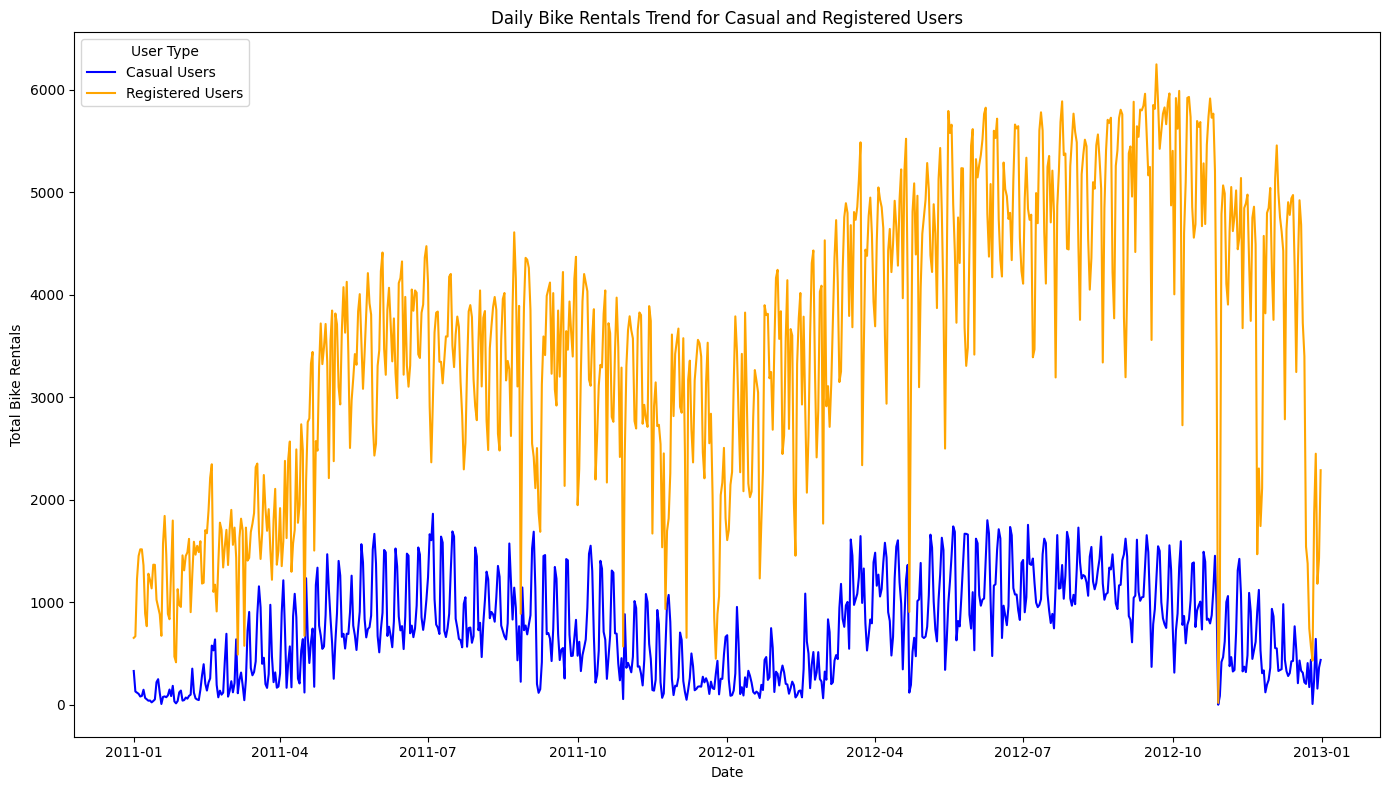

In [33]:
# Visualisasi data
plt.figure(figsize=(14, 8)) # ukuran figure
sns.lineplot(x='date', y='casual_users', data=daily_user_rentals, label='Casual Users', color='blue') # membuat line plot untuk pengguna kasual
sns.lineplot(x='date', y='registered_users', data=daily_user_rentals, label='Registered Users', color='orange') # membuat line plot untuk pengguna terdaftar
plt.title('Daily Bike Rentals Trend for Casual and Registered Users') # judul plot
plt.xlabel('Date') # label sumbu x
plt.ylabel('Total Bike Rentals') # label sumbu y
plt.legend(title='User Type') # legenda
plt.tight_layout() # layout yang pas
plt.show() # menampilkan plot

Berdasarkan visualisasi diatas, kita bisa melihat laporan harian untuk tiap pengguna dari 01-01-2011 hingga 31-12-2012. Untuk perbedaannya sangat terlihat bahwa pengguna terbanyak dalam melakukan penyewaan sepeda yaitu pengguna terdaftar dan semakin bertambahnya waktu dari 2011 ke 2012 memiliki kenaikan pengguna terdaftar. Sedangkan pengguna kasual lebih terlihat stabil dari waktu 2011 ke 2012.

#### Pertanyaan 2. Bulan apa yang paling banyak dan paling sedikit untuk setiap pengguna?

<Figure size 1400x800 with 0 Axes>

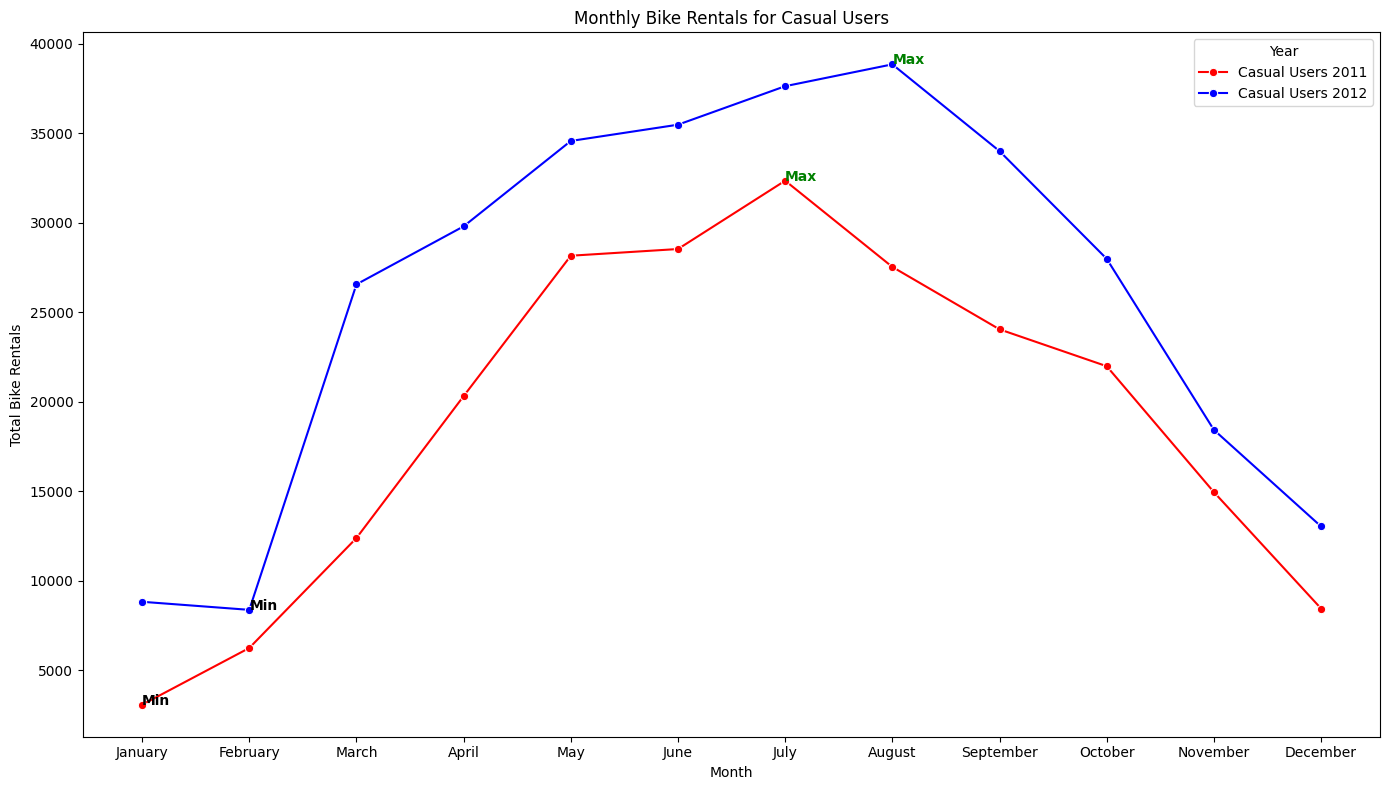

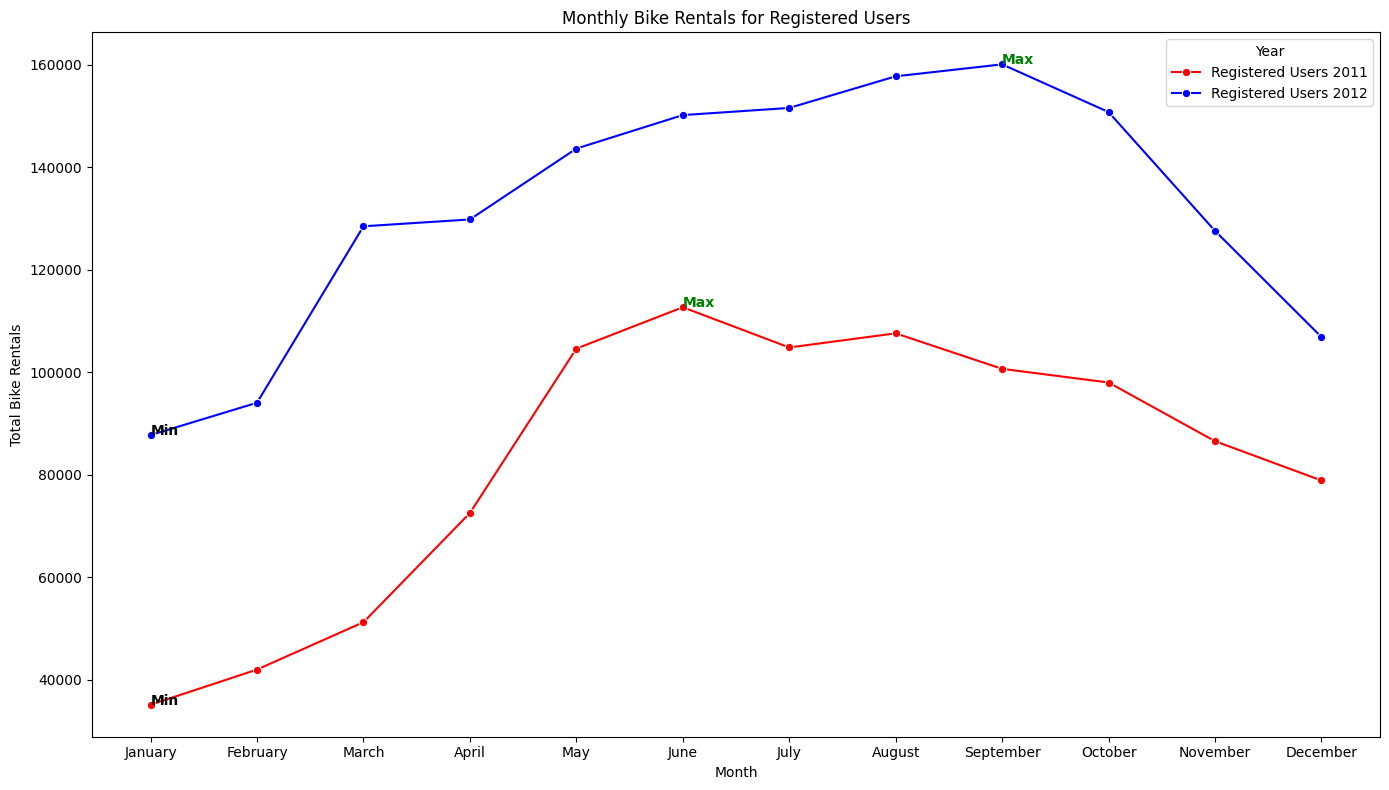

In [34]:
# Visualisasi data
plt.figure(figsize=(14, 8)) # ukuran figure
# Membuat figure untuk pengguna kasual
plt.figure(figsize=(14, 8))
ax1 = sns.lineplot(x='month', y='casual_users', data=monthly_user_rentals_sum[monthly_user_rentals_sum['year'] == '2011'], marker='o', color='red', label='Casual Users 2011')
sns.lineplot(x='month', y='casual_users', data=monthly_user_rentals_sum[monthly_user_rentals_sum['year'] == '2012'], marker='o', color='blue', label='Casual Users 2012')
plt.title('Monthly Bike Rentals for Casual Users')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.legend(title='Year')

# Menambahkan keterangan paling banyak dan paling sedikit untuk pengguna kasual
max_casual = monthly_user_rentals_sum.groupby('year')['casual_users'].idxmax()
min_casual = monthly_user_rentals_sum.groupby('year')['casual_users'].idxmin()
for idx in max_casual:
    ax1.text(monthly_user_rentals_sum.loc[idx, 'month'], monthly_user_rentals_sum.loc[idx, 'casual_users'], 'Max', color='green', weight='bold')
for idx in min_casual:
    ax1.text(monthly_user_rentals_sum.loc[idx, 'month'], monthly_user_rentals_sum.loc[idx, 'casual_users'], 'Min', color='black', weight='bold')

plt.tight_layout()
plt.show()

# Membuat figure untuk pengguna terdaftar
plt.figure(figsize=(14, 8))
ax2 = sns.lineplot(x='month', y='registered_users', data=monthly_user_rentals_sum[monthly_user_rentals_sum['year'] == '2011'], marker='o', color='red', label='Registered Users 2011')
sns.lineplot(x='month', y='registered_users', data=monthly_user_rentals_sum[monthly_user_rentals_sum['year'] == '2012'], marker='o', color='blue', label='Registered Users 2012')
plt.title('Monthly Bike Rentals for Registered Users')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.legend(title='Year')

# Menambahkan keterangan paling banyak dan paling sedikit untuk pengguna terdaftar
max_registered = monthly_user_rentals_sum.groupby('year')['registered_users'].idxmax()
min_registered = monthly_user_rentals_sum.groupby('year')['registered_users'].idxmin()
for idx in max_registered:
    ax2.text(monthly_user_rentals_sum.loc[idx, 'month'], monthly_user_rentals_sum.loc[idx, 'registered_users'], 'Max', color='green', weight='bold')
for idx in min_registered:
    ax2.text(monthly_user_rentals_sum.loc[idx, 'month'], monthly_user_rentals_sum.loc[idx, 'registered_users'], 'Min', color='black', weight='bold')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas, bulan paling banyak dan paling sedikit di tahun 2011 untuk pengguna kasual ada di bulan juli dan januari. Sedangkan untuk di tahun 2012 ada di bulan Agustus dan February. Ini menandakan bahwa pengguna kasual memiliki riwayat penyewaan tertinggi ada di pertengahan tahun dan penyewaan terendah ada di awal tahun yang mengindikasikan pengguna kasual sangat jarang sekali melakukan penyewaan di hari libur tahun baru yang mungkin pengguna kasual menghabiskan waktunya bersama keluarga saat hari libur tahun baru dan juga bisa kita lihat peningkatan paling drastis ada di bulan februari ke maret 2012. Untuk bulan paling banyak dan paling sedikit di tahun 2011 untuk pengguna terdaftar ada di bulan Juni dan Januari. Sedangkan untuk di tahun 2012 ada di bulan September dan January. Ini menandakan bahwa pengguna terdaftar memiliki riwayat penyewaan tertinggi ada di pertengahan tahun dan penyewaan terendah ada di awal tahun yang sama seperti pengguna kasual.

#### Pertanyaan 3. Di musim apa yang paling banyak dan paling sedikit untuk setiap pengguna?

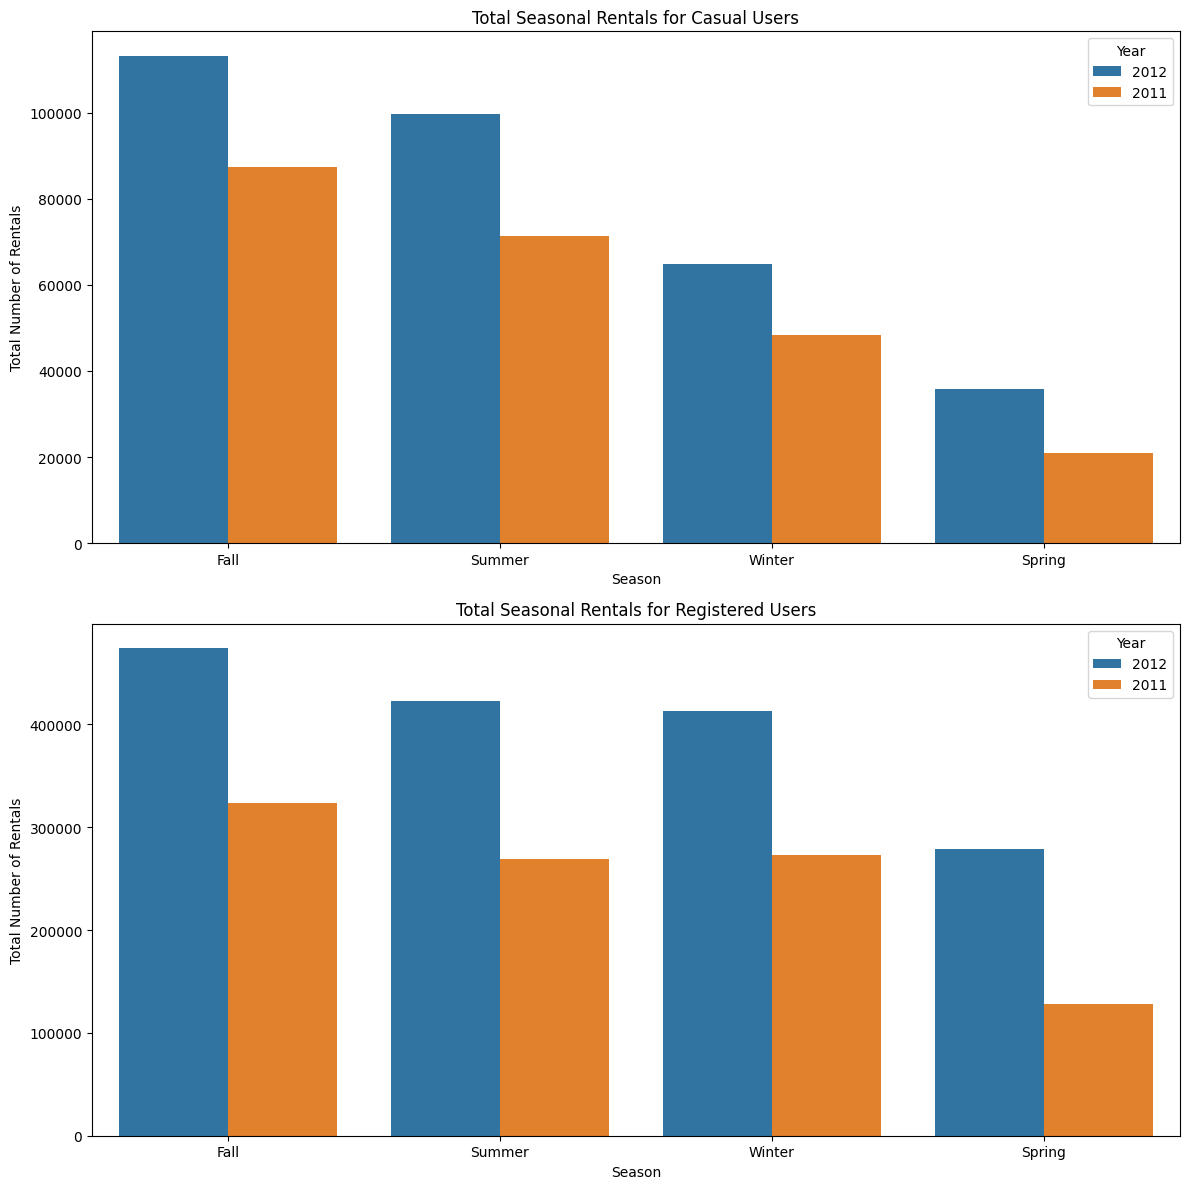

In [35]:
# Visualisasi data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Grafik untuk pengguna kasual
sns.barplot(data=seasonal_user_rentals_sum.sort_values(by='casual_users', ascending=False), x='season', y='casual_users', hue='year', ax=ax1)
ax1.set_title('Total Seasonal Rentals for Casual Users')
ax1.set_xlabel('Season')
ax1.set_ylabel('Total Number of Rentals')
ax1.legend(title='Year')

# Grafik untuk pengguna terdaftar
sns.barplot(data=seasonal_user_rentals_sum.sort_values(by='registered_users', ascending=False), x='season', y='registered_users', hue='year', ax=ax2)
ax2.set_title('Total Seasonal Rentals for Registered Users')
ax2.set_xlabel('Season')
ax2.set_ylabel('Total Number of Rentals')
ax2.legend(title='Year')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas, untuk tiap pengguna di 2 tahun terakhir memiliki penyewaan tertinggi di musim Fall dan penyewaan terendah di musim Spring. Ini menandakan pengguna lebih menyukai untuk menyewa sepeda di musim Fall.

#### Pertanyaan 4. Bagaimana demografi untuk setiap pengguna?

##### Berdasarkan Jam

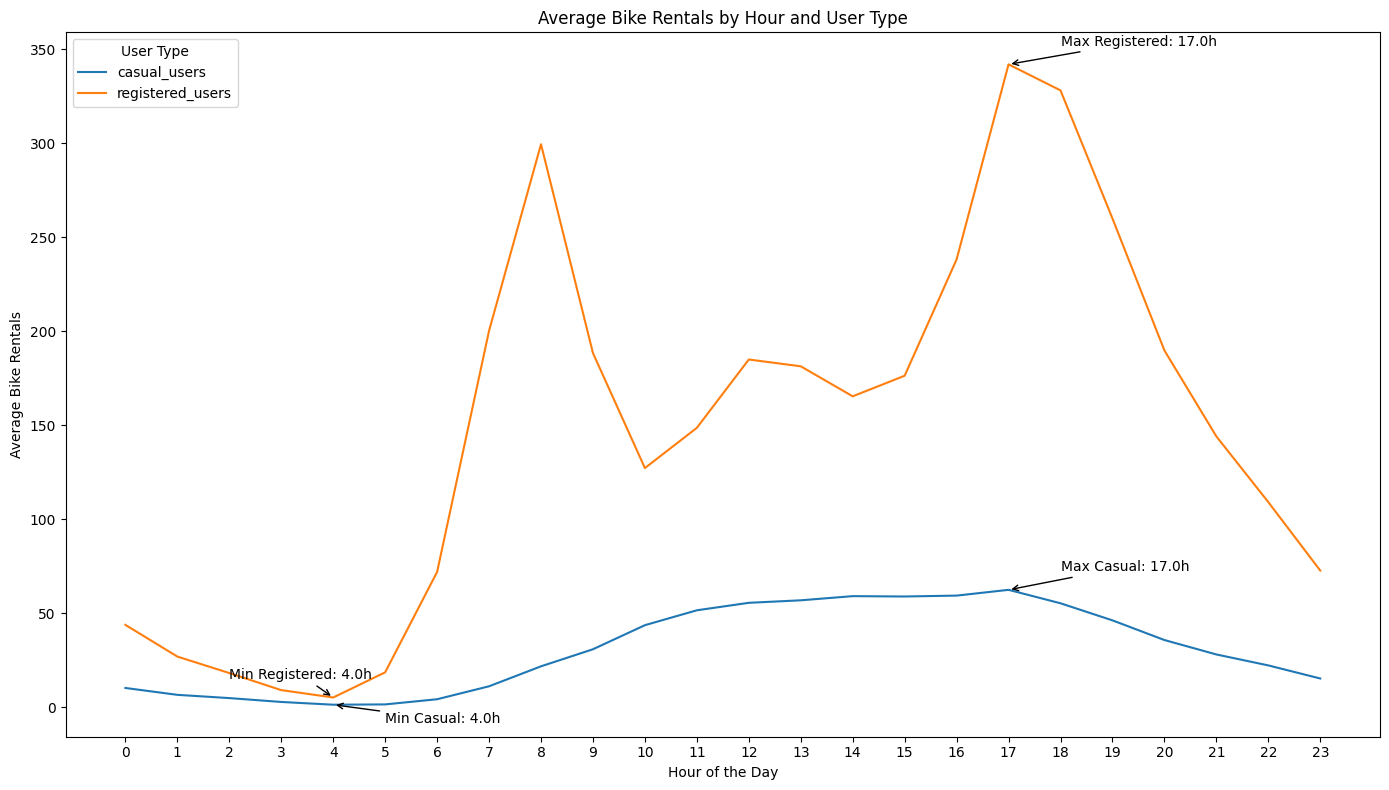

In [36]:
# Visualisasi data
plt.figure(figsize=(14, 8)) # ukuran figure
hourly_user_rentals_avg_melted = hourly_user_rentals_avg.melt(id_vars='hour', value_vars=['casual_users', 'registered_users'], var_name='User Type', value_name='Average Rentals')
sns.lineplot(x='hour', y='Average Rentals', hue='User Type', data=hourly_user_rentals_avg_melted) # membuat line plot
plt.title('Average Bike Rentals by Hour and User Type') # judul plot
plt.xlabel('Hour of the Day') # label sumbu x
plt.ylabel('Average Bike Rentals') # label sumbu y
# Menambahkan keterangan untuk jam paling banyak dan paling sedikit di masing-masing pengguna
max_casual = hourly_user_rentals_avg.loc[hourly_user_rentals_avg['casual_users'].idxmax()]
min_casual = hourly_user_rentals_avg.loc[hourly_user_rentals_avg['casual_users'].idxmin()]
max_registered = hourly_user_rentals_avg.loc[hourly_user_rentals_avg['registered_users'].idxmax()]
min_registered = hourly_user_rentals_avg.loc[hourly_user_rentals_avg['registered_users'].idxmin()]

plt.annotate(f'Max Casual: {max_casual["hour"]}h', xy=(max_casual['hour'], max_casual['casual_users']), xytext=(max_casual['hour']+1, max_casual['casual_users']+10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Min Casual: {min_casual["hour"]}h', xy=(min_casual['hour'], min_casual['casual_users']), xytext=(min_casual['hour']+1, min_casual['casual_users']-10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Max Registered: {max_registered["hour"]}h', xy=(max_registered['hour'], max_registered['registered_users']), xytext=(max_registered['hour']+1, max_registered['registered_users']+10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Min Registered: {min_registered["hour"]}h', xy=(min_registered['hour'], min_registered['registered_users']), xytext=(min_registered['hour']-2, min_registered['registered_users']+10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xticks(ticks=range(0, 24, 1)) # mengatur ticks pada sumbu x menjadi kelipatan 1
plt.tight_layout() # layout yang pas
plt.show() # menampilkan plot

Berdasarkan visualisasi diatas, pengguna kasual lebih sering menyewa sepeda di jam 17 atau jam pulang kerja dan pengguna terdaftar lebih sering menyewa di jam 8 dan jam 17 sebagai puncaknya yang menandakan pengguna ini lebih sering menyewa di jam berangkat kerja dan pulang kerja. 

##### Berdasarkan hari dalam seminggu

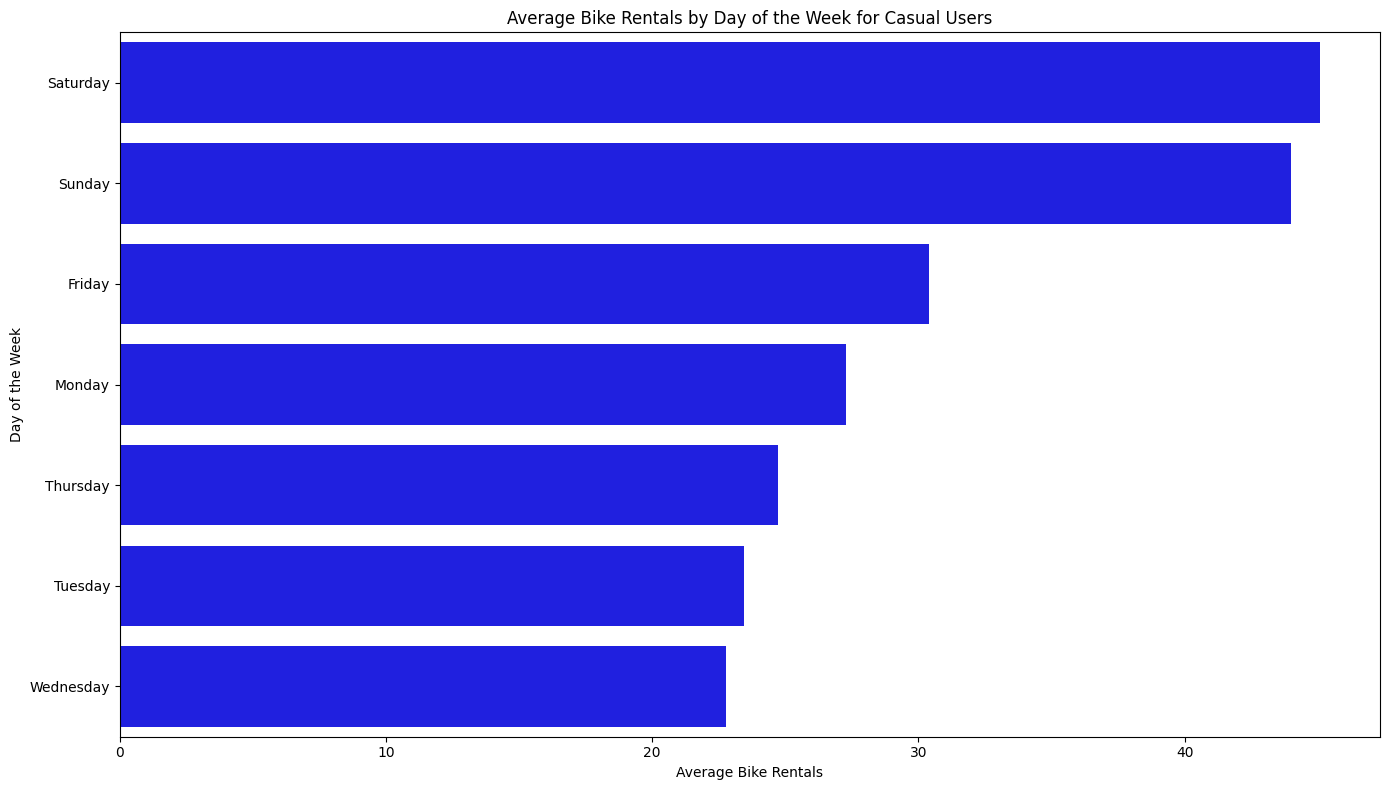

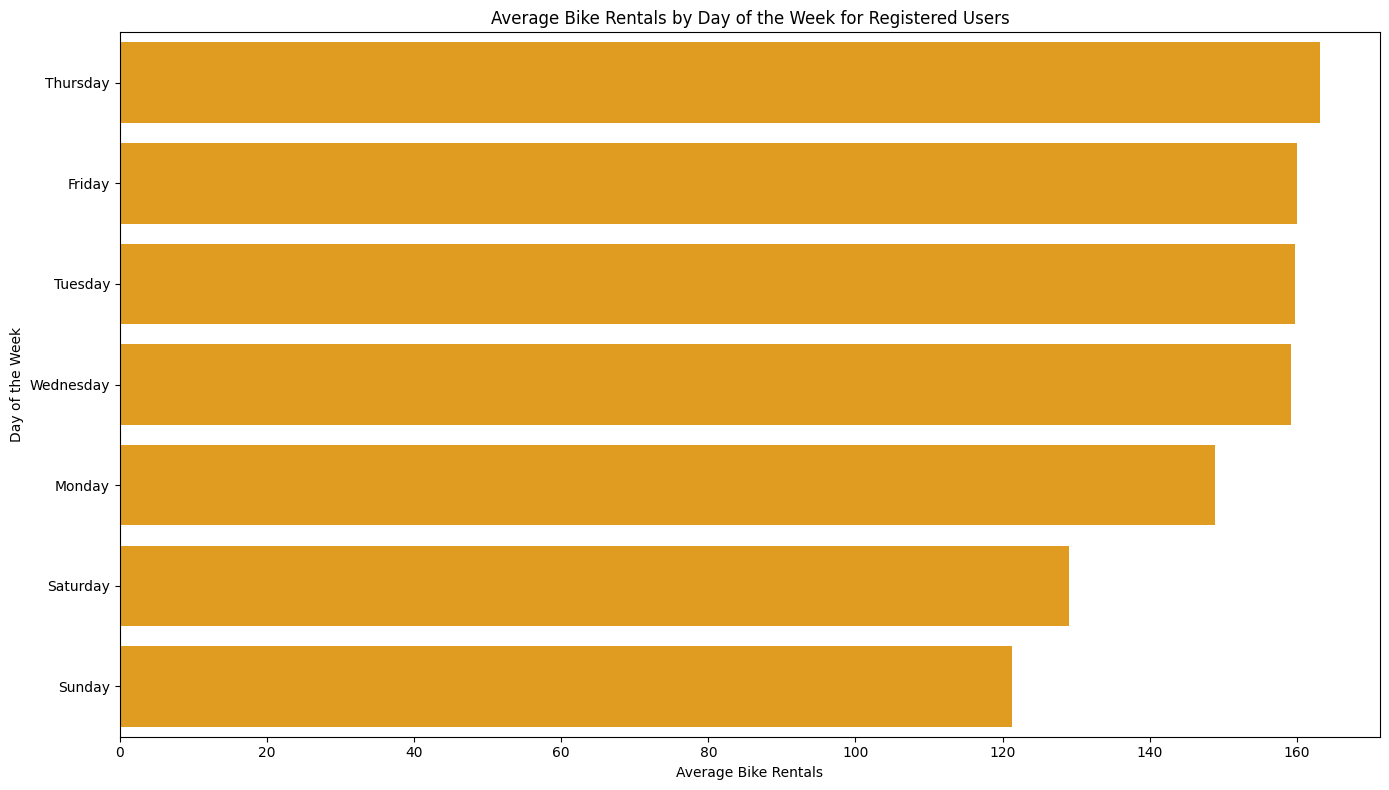

In [37]:
# Visualisasi data secara horizontal untuk pengguna kasual
plt.figure(figsize=(14, 8)) # ukuran figure
sns.barplot(y='weekday', x='casual_users', data=weekday_user_rentals_avg.sort_values(by='casual_users', ascending=False), color='blue') # membuat bar plot horizontal untuk pengguna kasual
plt.title('Average Bike Rentals by Day of the Week for Casual Users') # judul plot
plt.xlabel('Average Bike Rentals') # label sumbu x
plt.ylabel('Day of the Week') # label sumbu y
plt.tight_layout() # layout yang pas
plt.show() # menampilkan plot

# Visualisasi data secara horizontal untuk pengguna terdaftar
plt.figure(figsize=(14, 8)) # ukuran figure
sns.barplot(y='weekday', x='registered_users', data=weekday_user_rentals_avg.sort_values(by='registered_users', ascending=False), color='orange') # membuat bar plot horizontal untuk pengguna terdaftar
plt.title('Average Bike Rentals by Day of the Week for Registered Users') # judul plot
plt.xlabel('Average Bike Rentals') # label sumbu x
plt.ylabel('Day of the Week') # label sumbu y
plt.tight_layout() # layout yang pas
plt.show() # menampilkan plot

Berdasarkan visualisasi diatas, untuk pengguna kasual lebih sering menyewa sepeda di hari libur sedangkan pengguna terdaftar lebih sering menyewa sepeda di hari kerja.

## Conclusion

Berdasarkan analisa yang telah dilakukan dimulai dari tahap Data Wrangling hingga Data Visualization kita bisa menyimpulkan :
| Tertinggi | Pengguna Kasual | Pengguna Terdaftar |
|---|---|---|
| Jam | 17 | 8 & 17 |
| Hari dalam seminggu | Hari Libur | Hari Kerja |
| Bulan | Juli 2011 & Agustus 2012 | Juni 2011 & September 2012 |
| Musim | Fall | Fall |  

Dari kesimpulan analisa tersebut, perusahaan penyewa sepeda bisa mendapatkan insight untuk mempermudah dalam membuat sebuah keputusan agar potensi keuntungan bisa meningkat. 